In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def read_files(run):
    G_pdc = nx.read_gpickle("saved_graphs/{}_pdc_binary_complete.gpickle".format(run))
    G_dtf = nx.read_gpickle("saved_graphs/{}_dtf_binary_complete.gpickle".format(run))
    G_pdc_weighted = nx.read_gpickle("saved_graphs/{}_pdc_weighted_complete.gpickle".format(run))
    return G_pdc, G_dtf, G_pdc_weighted

In [3]:
run1 = "S071_S071R01"
run2 = "S071_S071R02"

In [4]:
run1_pdc, run1_dtf, run1_pdc_weighted = read_files(run1)
run2_pdc, run2_dtf, run2_pdc_weighted = read_files(run2)

## 2.1

In [5]:
def calculate_indices(graph, global_only=False, weight=None):
    # global clustering coefficient
    print("Global Clustering Coefficient", nx.average_clustering(graph, weight=weight), "\n")
    
    # global path length
    print("Global Path Length", nx.average_shortest_path_length(graph, weight=weight), "\n")
    
    if not global_only:
        # local indegree indices
        in_degree = dict(graph.in_degree())
        in_degree_sorted = sorted(in_degree.items(), key=lambda kv: kv[1], reverse=True)
        print("Top Indegree indices")
        print("\n".join(map(lambda node: "{}: {}".format(node[0], node[1]), in_degree_sorted[:10])), "\n")

        # local outdegree indices
        out_degree = dict(graph.out_degree())
        out_degree_sorted = sorted(out_degree.items(), key=lambda kv: kv[1], reverse=True)
        print("Top Outdegree indices")
        print("\n".join(map(lambda node: "{}: {}".format(node[0], node[1]), out_degree_sorted[:10])))

### RUN S071_S071R01

In [6]:
calculate_indices(run1_pdc)

Global Clustering Coefficient 0.3304588268990529 

Global Path Length 0.22842261904761904 

Top Indegree indices
T9: 28
P6: 25
P8: 24
P3: 23
T10: 21
Po4: 21
Cp5: 20
Cp6: 20
Tp8: 20
P1: 19 

Top Outdegree indices
Af7: 63
Af8: 63
Fp1: 62
Fpz: 62
Fp2: 62
P7: 53
Af3: 47
Af4: 47
Afz: 41
Cp3: 40


### RUN S071_S071R02

In [7]:
calculate_indices(run2_pdc)

Global Clustering Coefficient 0.28247631348358426 

Global Path Length 1.3980654761904763 

Top Indegree indices
P6: 53
C6: 34
Cp6: 34
Po8: 31
Po4: 30
T9: 25
P3: 25
T10: 24
Cp5: 23
Cp4: 23 

Top Outdegree indices
Cp1: 62
Cpz: 62
P7: 57
Fc4: 49
Cp3: 48
Af7: 43
Cz: 42
Fp1: 38
Fp2: 32
Af8: 30


## 2.3

In [8]:
# RUN 1
calculate_indices(run1_dtf, global_only=True)

Global Clustering Coefficient 0.2565012250450105 

Global Path Length 0.2140376984126984 



In [9]:
# RUN 2
calculate_indices(run2_dtf, global_only=True)

Global Clustering Coefficient 0.26332529923362225 

Global Path Length 1.2472718253968254 



## 2.4

In [10]:
densities = [1,5,10,20,30,50]

In [11]:
def read_density_networks(run):
    networks = []
    for i in range(len(densities)):
        n = nx.read_gpickle("saved_graphs/{}_pdc_{}.gpickle".format(run, densities[i]))
        networks.append(n)
    return networks

def average_path_length(n):
    try:
        return nx.average_shortest_path_length(n)   
    # if graph is not connected
    except nx.NetworkXError:
        return 0
    

In [12]:
networks_run1 = read_density_networks(run1)
networks_run2 = read_density_networks(run2)

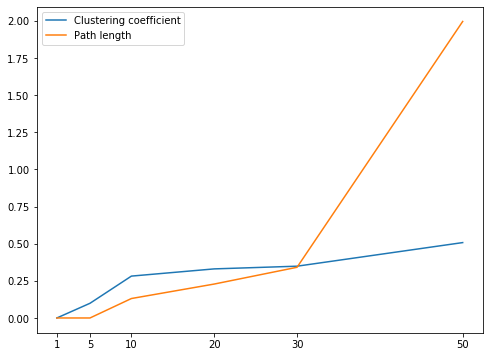

In [13]:
# clustering coefficient
gcc = [nx.average_clustering(n) for n in networks_run1]
# path length
gpl = [average_path_length(n) for n in networks_run1]

# plt.title("Dependency of global indices on network density")
plt.figure(1, figsize=(8,6)) 
plt.plot(densities, gcc, label="Clustering coefficient")
plt.plot(densities, gpl, label="Path length")
plt.xticks(densities)
plt.legend()
plt.show()

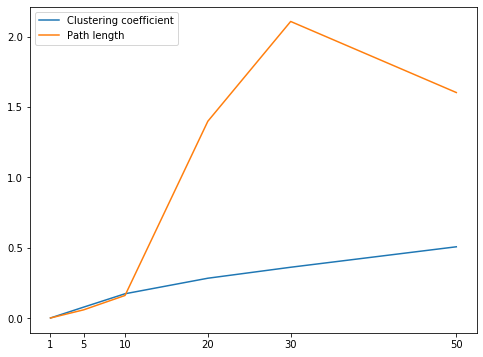

In [14]:
# clustering coefficient
gcc = [nx.average_clustering(n) for n in networks_run2]
# path length
gpl = [average_path_length(n) for n in networks_run2]

# plt.title("Dependency of global indices on network density")
plt.figure(1, figsize=(8,6)) 
plt.plot(densities, gcc, label="Clustering coefficient")
plt.plot(densities, gpl, label="Path length")
plt.xticks(densities)
plt.legend()
plt.show()

## 2.7

In [15]:
calculate_indices(run1_pdc_weighted, global_only=True, weight="weight")

Global Clustering Coefficient 0.20934144916362213 

Global Path Length 0.08950230451078688 



In [16]:
calculate_indices(run2_pdc_weighted, global_only=True, weight="weight")

Global Clustering Coefficient 0.31113908429646214 

Global Path Length 0.07405300760095199 

